In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# Load the dataset into a Pandas DataFrame
file_path = '/content/drive/MyDrive/Colab/NU/IE6200/stations.csv'
stations_df = pd.read_csv(file_path)
stations_df.head()

,Number,NAME,Lat,Long,Seasonal Status,Municipality,Total Docks
0,L32001,Railroad Lot and Minuteman Bikeway,42.416065,-71.153366,Year Round,Arlington,11.0
1,L32002,Linwood St at Minuteman Bikeway,42.409354,-71.149065,Year Round,Arlington,11.0
2,L32005,Thorndike Field at Minuteman Bikeway,42.400168,-71.144570,Year Round,Arlington,11.0
3,L32003,Mass Ave at Grafton St,42.407261,-71.143821,Winter Storage,Arlington,11.0
4,L32004,Broadway at Grafton St,42.409942,-71.140093,Winter Storage,Arlington,11.0


In [3]:
# Missing values
missing_values = stations_df.isnull().sum()
missing_values

,0
Number,0
NAME,0
Lat,0
Long,0
Seasonal Status,6
Municipality,0
Total Docks,6


In [4]:
# Number of rows with at least one missing value
missing_value_count = stations_df[stations_df.isnull().any(axis=1)].shape[0]
print(f"Number of rows with at least one missing value: {missing_value_count}")

Number of rows with at least one missing value: 6


In [5]:
# Remove rows with any missing values
stations_df = stations_df.dropna()

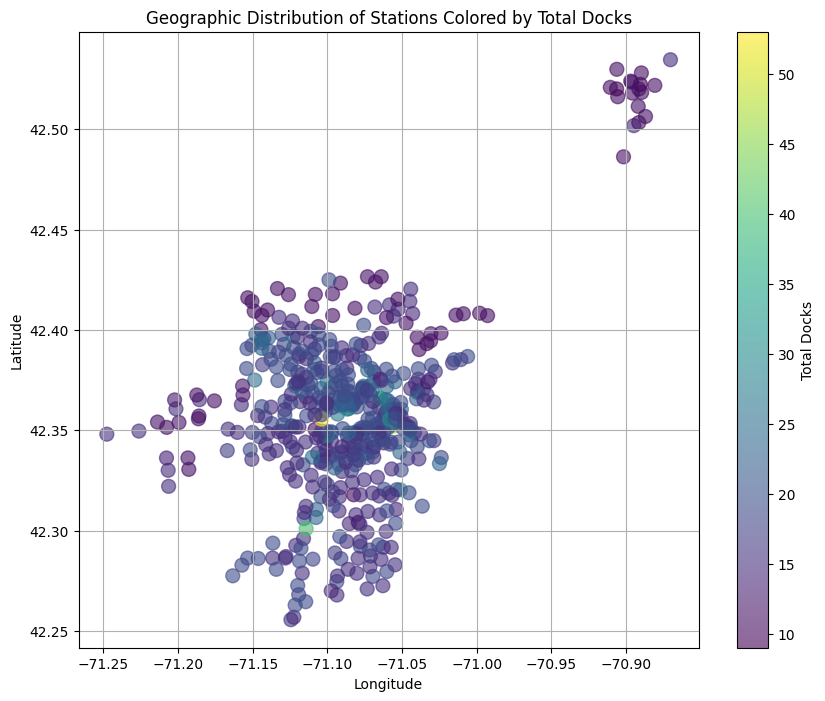

In [6]:
# Geographic Distribution of Stations Colored by Total Docks
plt.figure(figsize=(10, 8))
plt.scatter(stations_df['Long'], stations_df['Lat'], c=stations_df['Total Docks'], cmap='viridis', s=100, alpha=0.6)
plt.colorbar(label='Total Docks')
plt.title('Geographic Distribution of Stations Colored by Total Docks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [7]:
# An Interactive Map Visualizing Station Locations
m = folium.Map(location=[stations_df['Lat'].mean(), stations_df['Long'].mean()], zoom_start=12)

# Add stations to the map
for idx, row in stations_df.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Long']),
        radius=row['Total Docks'] / 2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row['NAME']
    ).add_to(m)

# Save the map to an HTML file
m.save('stations_map.html')

# Display the map
m

[View Stations Map](stations_map.html)

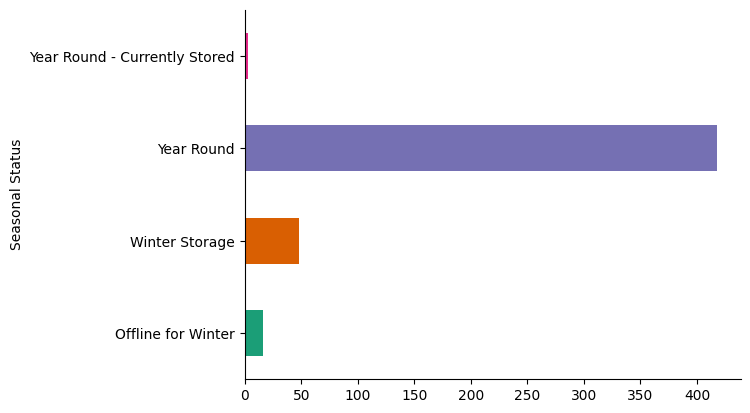

In [8]:
# Horizontal Bar Plot of Seasonal Status Distribution
stations_df.groupby('Seasonal Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

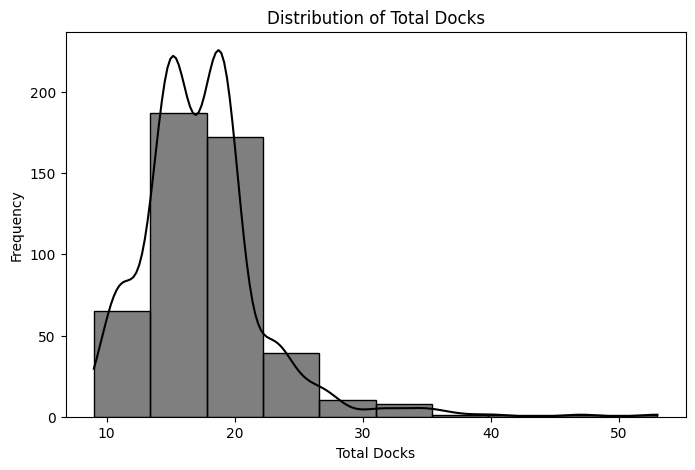

In [9]:
# Distribution of total docks
plt.figure(figsize=(8, 5))
sns.histplot(stations_df['Total Docks'], bins=10, color='black', kde=True)
plt.title('Distribution of Total Docks')
plt.xlabel('Total Docks')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

<ipython-input-10-1dcb40de9850>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Municipality', y='Total Docks', data=stations_df, palette='Set3')


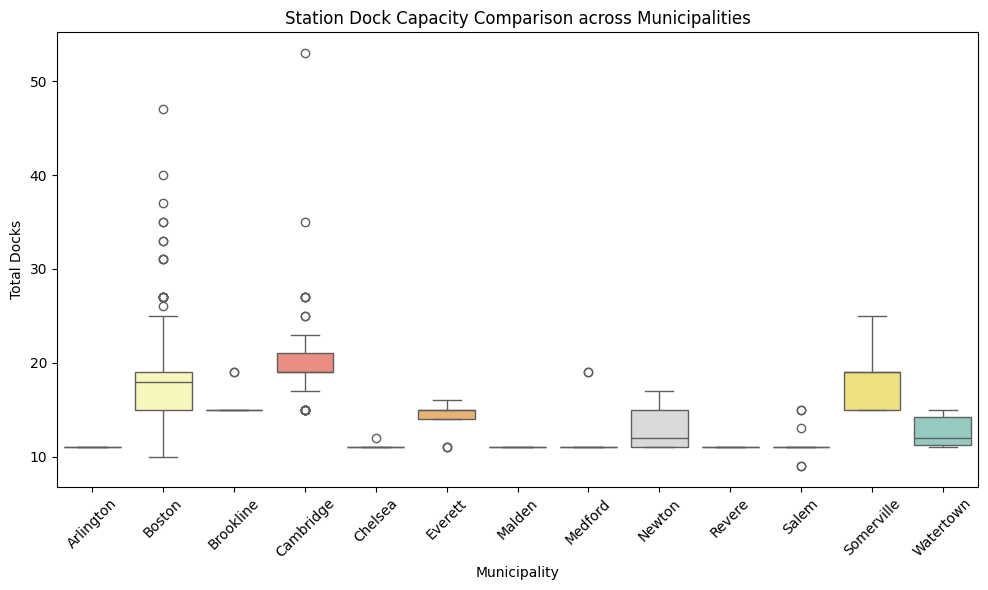

In [10]:
# Station Dock Capacity Comparison (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Municipality', y='Total Docks', data=stations_df, palette='Set3')
plt.title('Station Dock Capacity Comparison across Municipalities')
plt.xlabel('Municipality')
plt.ylabel('Total Docks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

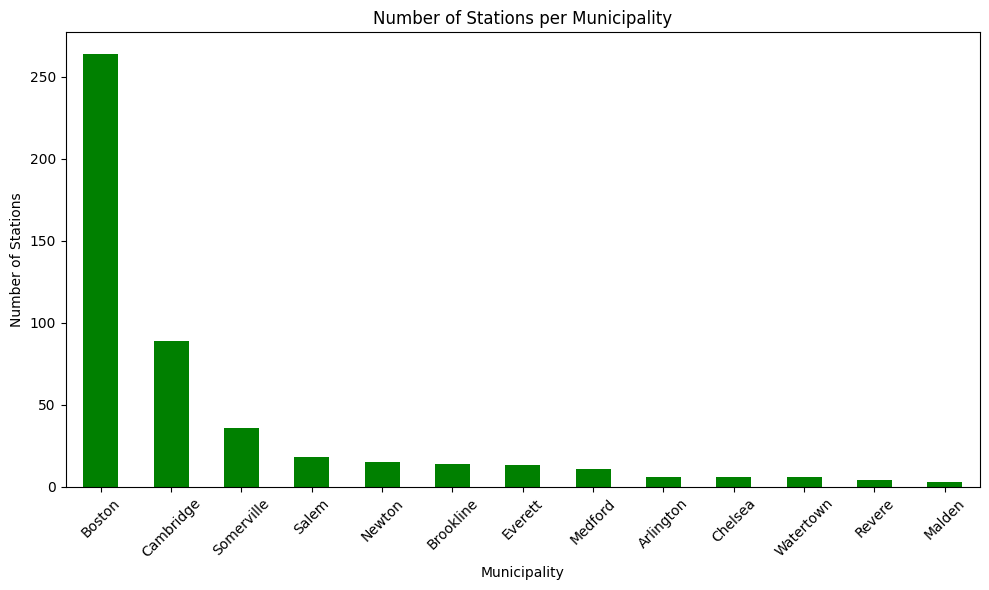

In [11]:
# Number of Stations per Municipality
plt.figure(figsize=(10, 6))
stations_per_municipality = stations_df['Municipality'].value_counts()
stations_per_municipality.plot(kind='bar', color='green')
plt.title('Number of Stations per Municipality')
plt.xlabel('Municipality')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

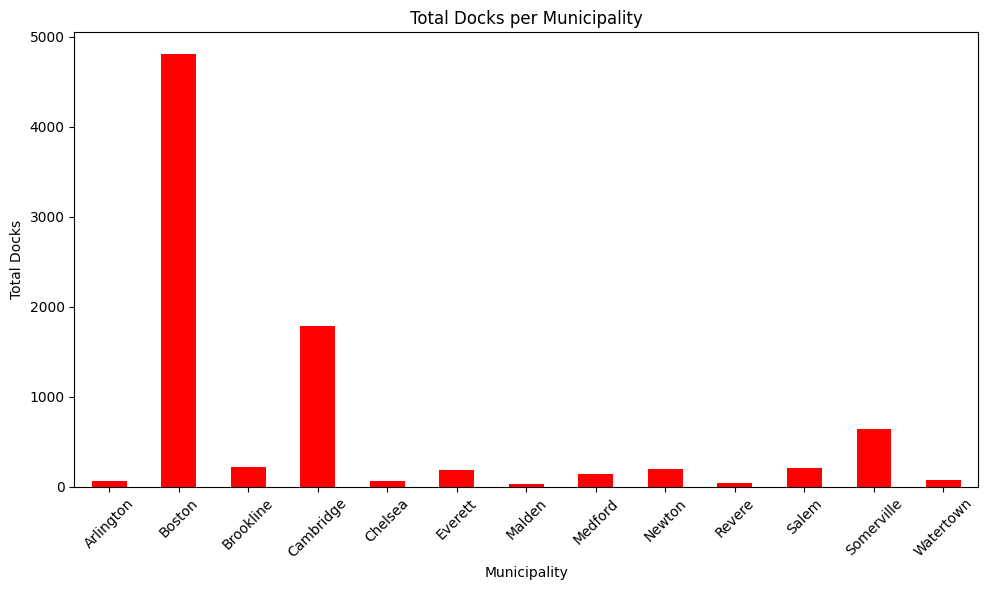

In [12]:
# Total Docks per Municipality
plt.figure(figsize=(10, 6))
docks_per_municipality = stations_df.groupby('Municipality')['Total Docks'].sum()
docks_per_municipality.plot(kind='bar', color='red')
plt.title('Total Docks per Municipality')
plt.xlabel('Municipality')
plt.ylabel('Total Docks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

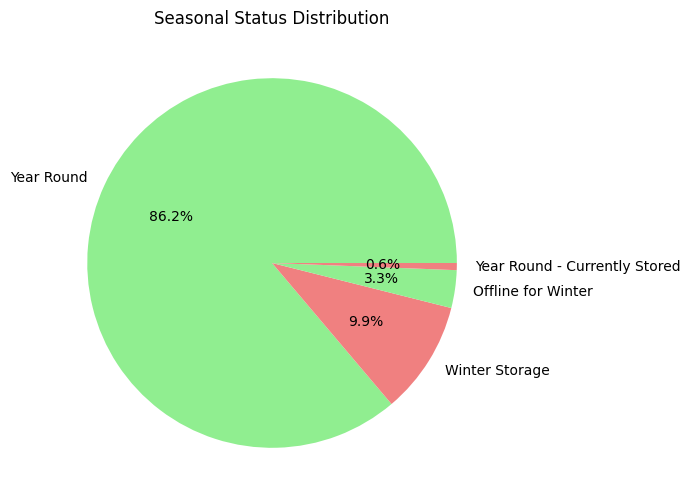

In [13]:
# Seasonal Status Distribution
plt.figure(figsize=(6, 6))
seasonal_status_counts = stations_df['Seasonal Status'].value_counts()
seasonal_status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Seasonal Status Distribution')
plt.ylabel('')  # Remove y-label
plt.show()